In [10]:
# coding: utf-8

import xarray as xr
import numpy as np
from glob import glob
import sys
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pickle
import calendar
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.colors as cls
import matplotlib as mpl
import copy
import pandas as pd

In [11]:
# Opening a dataset just to get the lat/lon of the grid
aux1 = xr.open_dataset('/chinook/marinier/CONUS_2D/CTRL/2000/wrf2d_d01_CTRL_T2_200010-200012.nc', engine='netcdf4') 
#store = '/chinook/cruman/Data/WetSnow'
#auxPlot = f'/{store}/WetSnow_SN_200010-200012.nc'
#auxPlot = xr.open_dataset(auxPlot)
#auxPlot['S_Events'] = (('south_north', 'west_east'), b)
#auxPlot['S_EventsAVG'] = (('south_north', 'west_east'), b/12)

In [12]:
df = pd.read_csv('stations_dist_v2.dat', sep=';')

In [13]:
llat = []
llon = []
lnear0 = []
lnear0rain = []
for row in df.iterrows():
    lat = float(row[1]['LAT'])
    lon = float(row[1]['LON'])
    near0 = float(row[1]['NEAR0'])
    near0rain = float(row[1]['NEAR0_P01'])
    llat.append(lat)
    llon.append(lon)
    lnear0.append(near0)    
    lnear0rain.append(near0rain)

In [14]:
xll, yll = aux1.XLONG.values[0, 0],aux1.XLAT.values[0, 0]
xur, yur = aux1.XLONG.values[-1, -1],aux1.XLAT.values[-1, -1]

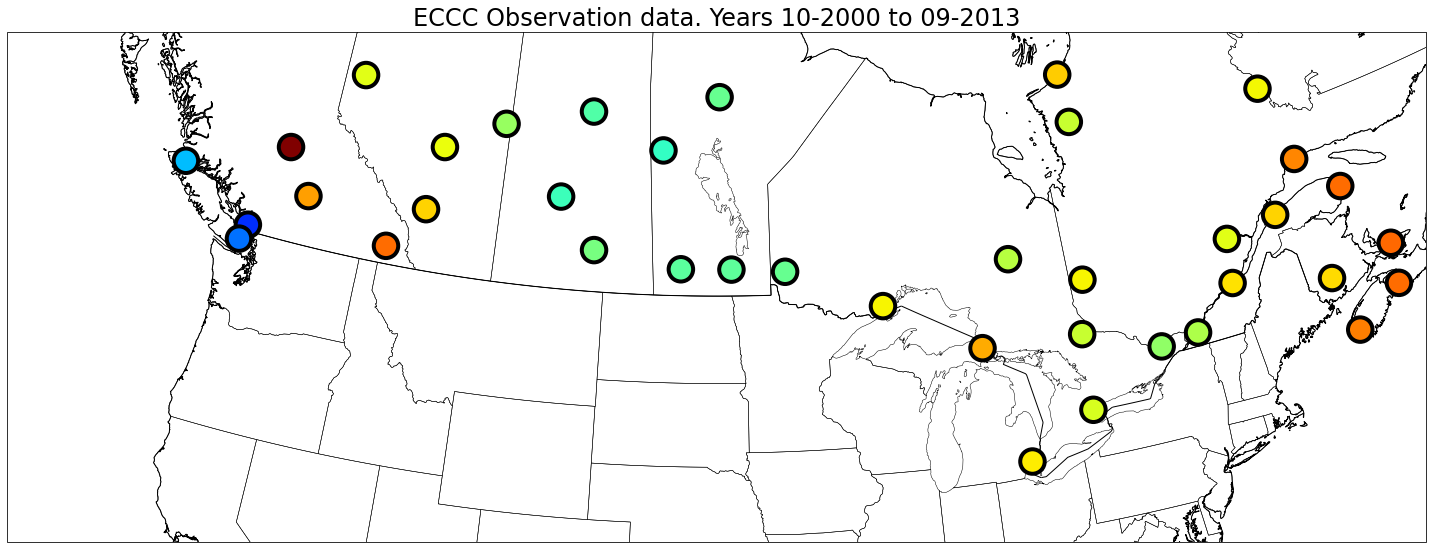

In [15]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 2040 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 120
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"ECCC Observation data. Years 10-2000 to 09-2013"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

 
plt.scatter(x=llat, y=llon, c=lnear0, cmap=new_cmap, s=600, edgecolor='black', lw=4, transform=ccrs.PlateCarree())

#norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
#cs = aux1['total_hour'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
#           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max, extend='max')

# Plot colorbar
#cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")
#cb.ax.set_title(unit, fontsize=30)
#cb.ax.tick_params(labelsize=30, labelrotation=45) 
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width, zorder=0)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=0)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=0)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

#plt.savefig('eccc_stations.png')
plt.show()

/home/cruman/.conda/envs/base_plus_caio/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1546: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  result = matplotlib.axes.Axes.scatter(self, *args, **kwargs)


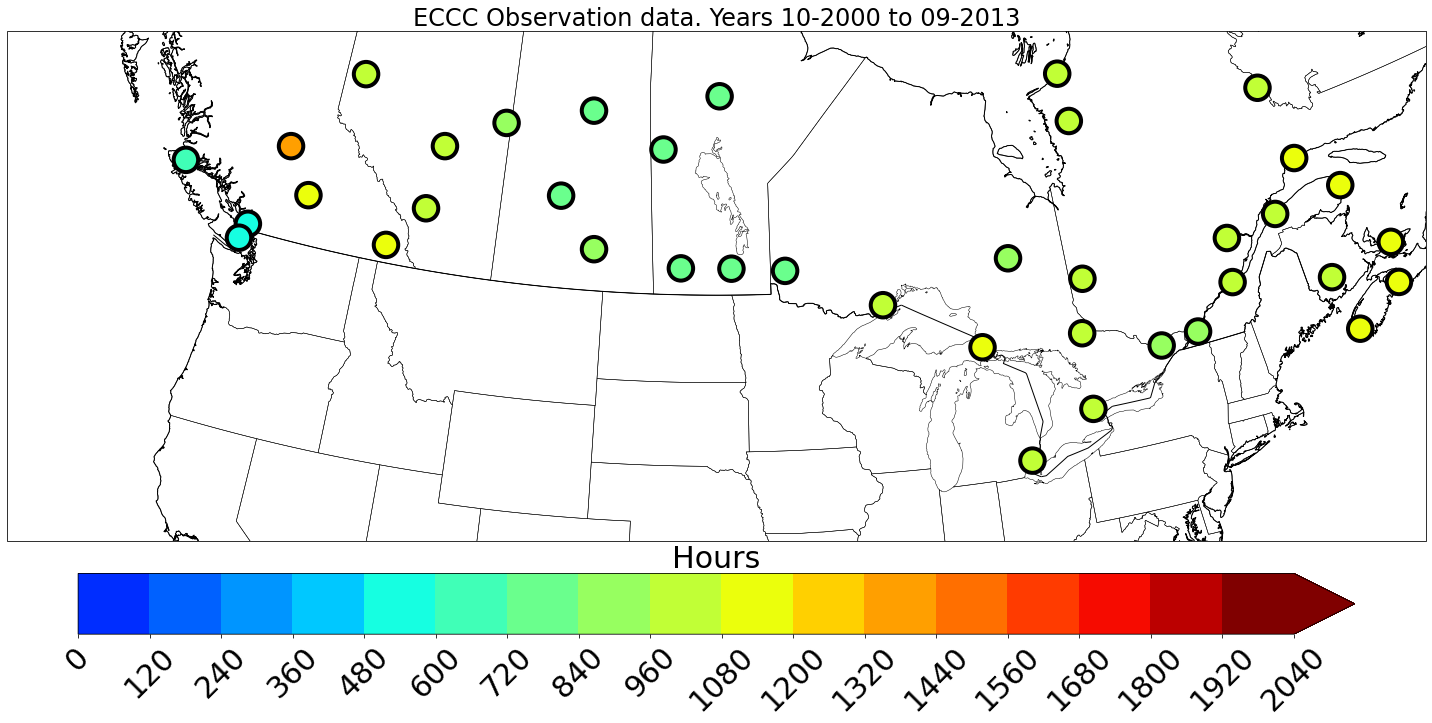

In [16]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 2040 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 120
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"ECCC Observation data. Years 10-2000 to 09-2013"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256) 
#norm = mpl.colors.Normalize(vmin=val_min,vmax=val_max)
cs = plt.scatter(x=llat, y=llon, c=lnear0, cmap=new_cmap, s=600, edgecolor='black', lw=4, 
                 transform=ccrs.PlateCarree(), vmin=0, vmax=val_max, norm=norm)


# Plot figure
#cs = aux1['total_hour'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
#           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max, extend='max')

# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30, labelrotation=45) 
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width, zorder=0)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=0)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=0)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

#plt.savefig('eccc_stations.png')
plt.show()

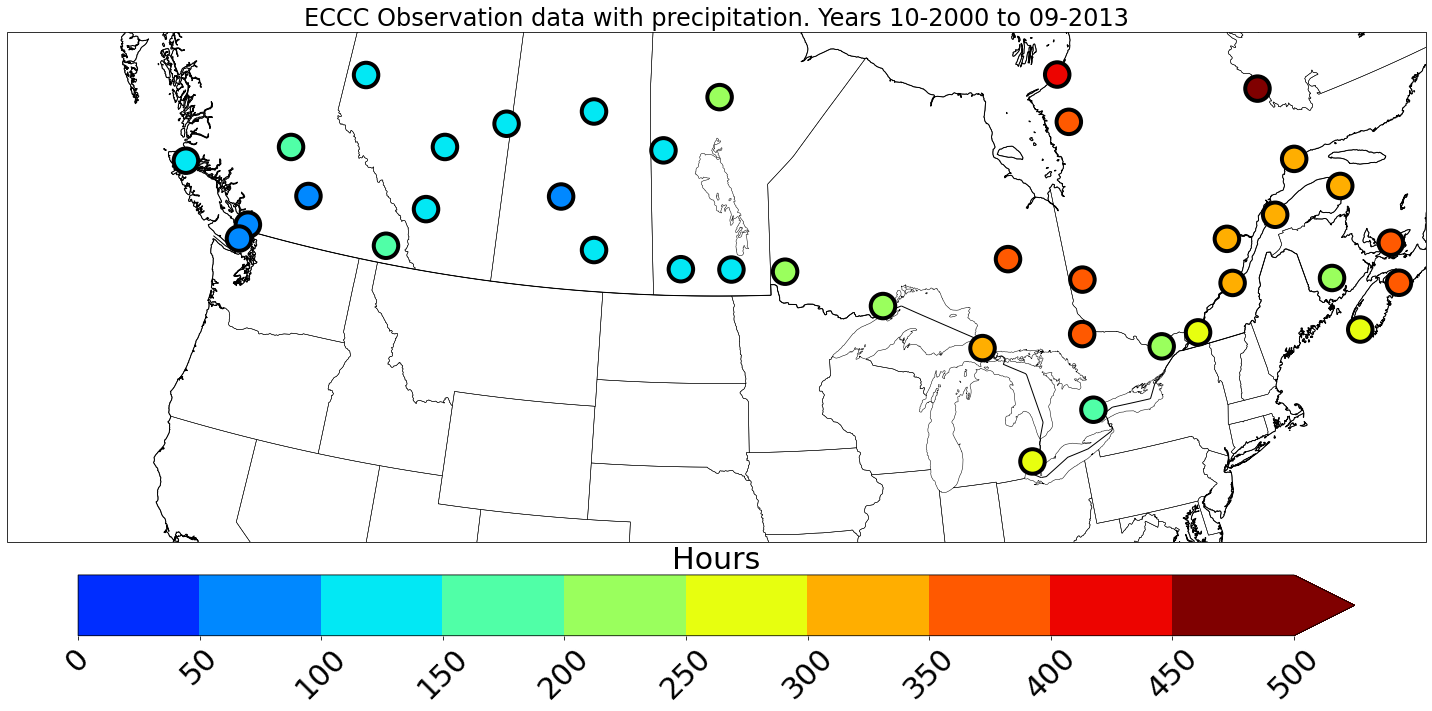

In [32]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 500 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 50
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"ECCC Observation data with precipitation. Years 10-2000 to 09-2013"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256) 
cs = plt.scatter(x=llat, y=llon, c=lnear0rain, cmap=new_cmap, s=600, edgecolor='black', lw=4, 
                 transform=ccrs.PlateCarree(), vmin=0, vmax=val_max, norm=norm)


# Plot figure
#cs = aux1['total_hour'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
#           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max, extend='max')

# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30, labelrotation=45) 
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width, zorder=0)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=0)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=0)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('eccc_stations_rain.png')
plt.show()